<a href="https://colab.research.google.com/github/asala1994/Capstone-Project-IBM/blob/master/Part_2_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

# **Here we will compare the clusters with income and nationality**

**Upload and cleaning of the household income by neighborhood**

In [ ]:
money=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Certification/Capstone Project/2017_rendatributariamitjanaunitatconsum.csv')

In [ ]:
money.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Euros
0,2017,1,Ciutat Vella,1,el Raval,1,26107
1,2017,1,Ciutat Vella,1,el Raval,2,21293
2,2017,1,Ciutat Vella,1,el Raval,3,23006
3,2017,1,Ciutat Vella,1,el Raval,4,26101
4,2017,1,Ciutat Vella,1,el Raval,5,20926


In [ ]:
money=money.rename(columns={"Nom_Barri": "Neighborhood.Name"})

In [ ]:
money.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Neighborhood.Name,Seccio_Censal,Import_Euros
0,2017,1,Ciutat Vella,1,el Raval,1,26107
1,2017,1,Ciutat Vella,1,el Raval,2,21293
2,2017,1,Ciutat Vella,1,el Raval,3,23006
3,2017,1,Ciutat Vella,1,el Raval,4,26101
4,2017,1,Ciutat Vella,1,el Raval,5,20926


In [ ]:
clusters=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Certification/Capstone Project/bcn_clusters.csv')

In [ ]:
clusters.head()

,Unnamed: 0,Neighborhood.Name,Cluster Labels
0,0,el Raval,1
1,1,el Barri Gòtic,1
2,2,la Barceloneta,1
3,3,"Sant Pere, Santa Caterina i la Ribera",1
4,4,el Fort Pienc,1


In [ ]:
money_merged=clusters.merge(money, on="Neighborhood.Name")

In [ ]:
money_merged.head()

,Unnamed: 0,Neighborhood.Name,Cluster Labels,Any,Codi_Districte,Nom_Districte,Codi_Barri,Seccio_Censal,Import_Euros
0,0,el Raval,1,2017,1,Ciutat Vella,1,1,26107
1,0,el Raval,1,2017,1,Ciutat Vella,1,2,21293
2,0,el Raval,1,2017,1,Ciutat Vella,1,3,23006
3,0,el Raval,1,2017,1,Ciutat Vella,1,4,26101
4,0,el Raval,1,2017,1,Ciutat Vella,1,5,20926


In [ ]:
money_merged=money_merged.drop(['Unnamed: 0','Any',	'Codi_Districte',	'Nom_Districte',	'Codi_Barri',	'Seccio_Censal'	], axis=1)

In [ ]:
money_merged.head()

,Neighborhood.Name,Cluster Labels,Import_Euros
0,el Raval,1,26107
1,el Raval,1,21293
2,el Raval,1,23006
3,el Raval,1,26101
4,el Raval,1,20926


# **Boxplot of Income vs clusters**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
list(money_merged[money_merged['Cluster Labels'] == 1]['Import_Euros'])

In [ ]:
[money_merged[list(money_merged['Cluster Labels'] == i]['Import_Euros']) for i in range(7)]

Text(0, 0.5, 'Income by Family')

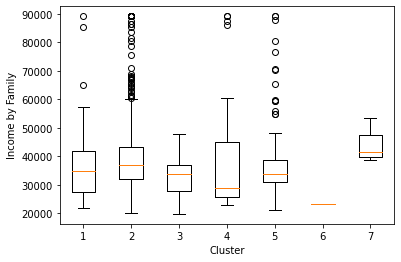

In [ ]:
plt.boxplot([list(money_merged[money_merged['Cluster Labels'] == i]['Import_Euros']) for i in range(7)])
plt.xlabel('Cluster')
plt.ylabel('Income by Family')

# **Violin Plot of income vs clusters**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


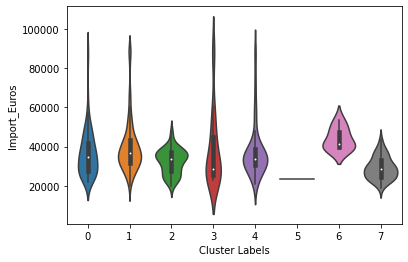

In [ ]:
ax = sns.violinplot(x="Cluster Labels", y="Import_Euros", data=money_merged)

# **Nationality data ordering and calculating in order to get a foreign nationality rate by neighborhood**

In [ ]:
nationality/content/drive/My Drive/Colab Notebooks/Data Science Certification/Capstone Project/2019_domicilis_nacionalitat_espanyola_estrangera.csv')

In [ ]:
nationality=nationality.rename(columns={"Nom_barri": "Neighborhood.Name"})

In [ ]:
nationality["Nombre Esp"] = 0
nationality["Nombre Estrangers"] = 0

for i, row in nationality.iterrows():
    nat = row["Nacionalitat"]
    num = row["Nombre"]
    if  nat == "1 espanyol":
        row['Nombre Esp'] = num
    elif nat == "2 espanyols":
        row['Nombre Esp'] = 2*num 
    elif nat == "3 espanyols":
        row['Nombre Esp'] = 3*num
    elif nat == "4 espanyols o més":
        row['Nombre Esp'] = 4*num
    elif  nat == "1 estranger":
        row['Nombre Estrangers'] = num
    elif nat == "2 estrangers":
        row['Nombre Estrangers'] = 2*num 
    elif nat == "3 estrangers":
        row['Nombre Estrangers'] = 3*num
    elif nat == "4 estrangers o més":
        row['Nombre Estrangers'] = 4*num
    else:
        print("Error: ", nat)
    nationality.loc[i,'Nombre Estrangers'] = row['Nombre Estrangers']
    nationality.loc[i,'Nombre Esp'] = row['Nombre Esp']

In [ ]:
gb_neighborhood = nationality.groupby(["Neighborhood.Name"])
gb_neighborhood_total_pop = gb_neighborhood["Nombre Esp"].sum() + gb_neighborhood["Nombre Estrangers"].sum()
gb_neighborhood_percent_estrangers = gb_neighborhood["Nombre Estrangers"].sum() / gb_neighborhood_total_pop

In [ ]:
nationalityrate=gb_neighborhood_percent_estrangers.to_frame()

In [ ]:
nationalityrate=nationalityrate.rename(columns={0: "rate"})

In [ ]:
nationalityrate_merged=clusters.merge(nationalityrate, on='Neighborhood.Name')

In [ ]:
nationalityrate_merged

,Unnamed: 0,Neighborhood.Name,Cluster Labels,rate
0,0,el Raval,1,0.488101
1,1,el Barri Gòtic,1,0.478627
2,2,la Barceloneta,1,0.382037
3,3,"Sant Pere, Santa Caterina i la Ribera",1,0.426291
4,4,el Fort Pienc,1,0.219536
5,5,la Sagrada Família,1,0.209741
6,6,la Dreta de l'Eixample,1,0.235882
7,7,l'Antiga Esquerra de l'Eixample,1,0.222089
8,8,la Nova Esquerra de l'Eixample,1,0.189836
9,9,Sant Antoni,1,0.220883


# **Violin Plot of the foreign nationality rate vs Clusters**

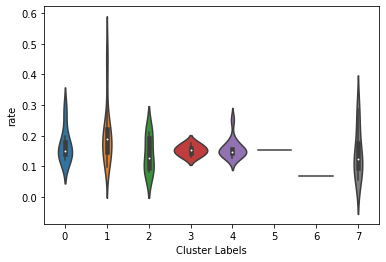

In [ ]:
ax = sns.violinplot(x="Cluster Labels", y="rate", data=nationalityrate_merged)